In [1]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np

In [5]:
ewa=pd.read_excel("C:\\Users\\kanis\\Documents\\Assignment\\Assignments data\\Clustering\\EastWestAirlines.xlsx",sheet_name=1)

In [14]:
ewa

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [19]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [22]:
df_norm=norm_func(ewa.iloc[:,1:-1])
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905


In [23]:
k = list(range(2,8))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
    
TWSS

[array([1185.5413391]),
 array([971.69315288]),
 array([879.62706381]),
 array([822.393353]),
 array([765.83296492]),
 array([717.90347691])]

Text(0, 0.5, 'total_ss')

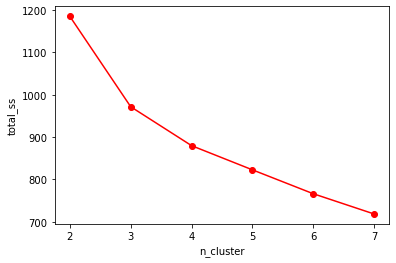

In [28]:
plt.plot(k,TWSS,'ro-');plt.xlabel('n_cluster');plt.ylabel('total_ss')

In [30]:
kmeans_clust=KMeans(n_clusters=6)
kmeans_clust.fit(df_norm)
kmeans_clust.labels_

array([2, 2, 2, ..., 4, 0, 0])

In [31]:
clusters=pd.DataFrame(kmeans_clust.labels_,columns=['clusterid'])

In [32]:
clusters

,clusterid
0,2
1,2
2,2
3,2
4,1
...,...
3994,0
3995,0
3996,4
3997,0


In [33]:
ewa['clusterid']=pd.DataFrame(clusters)

In [34]:
ewa

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,4
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [35]:
Result=ewa.iloc[:,1:-2].groupby(ewa.clusterid).mean()

In [36]:
Result

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
clusterid,,,,,,,,,,
0,37474.919125,129.475737,1.088487,1.015224,1.003806,4362.552807,6.988582,391.792578,1.114177,1756.505233
1,109837.772973,143.372973,3.508108,1.001802,1.005405,29696.592793,17.618018,404.843243,1.232432,6161.073874
2,77264.330113,189.671498,1.151369,1.016103,1.011272,5380.138486,8.289855,463.054750,1.476651,6675.035427
3,178533.482639,196.451389,4.965278,1.000000,1.093750,79248.670139,23.281250,902.020833,2.663194,5424.270833
4,82746.900685,119.022260,3.431507,1.001712,1.008562,29033.962329,18.023973,398.488014,1.150685,2880.104452
5,51402.914444,129.766667,1.106667,1.033333,1.003333,4861.190000,7.660000,470.272222,1.424444,4239.186667
